# Supervised Machine Learning (Classification/Logistic Regression)

Assignment WK6

**Titanic Survivals Prediction (Classification)**



# Import The Libraries

In [1]:
## import the ncessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load The Dataset

In [3]:
# Load the train and test dataset and set the index if applicable
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Set the index to 'PassengerId'
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)


In [4]:
# Print the head and tail of the train dataset
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Print the shape of the train and test datasets
print("Shape of the train dataset:", train.shape)
print("Shape of the test dataset:", test.shape)

# Print the data types of all the features in the train dataset
train.dtypes

Shape of the train dataset: (891, 11)
Shape of the test dataset: (418, 10)


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
train.describe().round(1)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,714.0,891.0,891.0,891.0
mean,0.4,2.3,29.7,0.5,0.4,32.2
std,0.5,0.8,14.5,1.1,0.8,49.7
min,0.0,1.0,0.4,0.0,0.0,0.0
25%,0.0,2.0,20.1,0.0,0.0,7.9
50%,0.0,3.0,28.0,0.0,0.0,14.5
75%,1.0,3.0,38.0,1.0,0.0,31.0
max,1.0,3.0,80.0,8.0,6.0,512.3


# Data Cleaning & Pre-processing

1. Identify and handle missing values. There are several missing values in the Titanic dataset. You can handle them by dropping the rows with missing values, imputing the missing values with the mean or median of the corresponding column, or using a more sophisticated method such as multiple imputation.
2. Convert categorical variables to numerical variables. Many of the variables in the Titanic dataset are categorical, such as Pclass, Sex, and Embarked. You need to convert these variables to numerical variables before using them in your machine learning models. One way to do this is to use one-hot encoding.

Dealing with the Missing Data

<Axes: ylabel='PassengerId'>

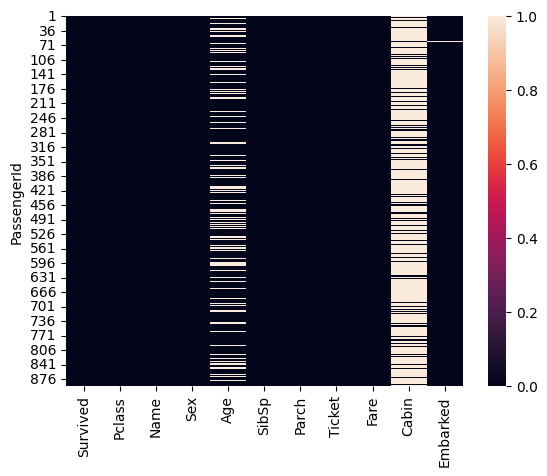

In [21]:
# Check for missing values
sns.heatmap(train.isna())

In [22]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Filling the missing data in the **train** DataFramee

In [9]:
# Fill the missing 'Age' data by the median of the 'Age' feature
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill the missing 'Embarked' data by the mode of the 'Embarked' feature
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Create a new feature called 'FamilySize' which is the sum of 'Parch' and 'SibSp'
train['FamilySize'] = train['Parch'] + train['SibSp']

In [10]:
# Drop the Feature 
train.drop(['Name', 'SibSp', 'Parch', 'Ticket','Cabin'], axis=1, inplace=True)

In [11]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

Filling the missing data in the **test** DataFrame

In [12]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test['FamilySize'] = test['Parch'] + test['SibSp']
test.drop(['Name', 'SibSp', 'Parch', 'Ticket','Cabin'], axis=1, inplace=True)

In [13]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
train['Sex'].groupby(train['Pclass']).value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

In [108]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

Converting Categorical Features

# Exploratory Data Analysis

**Survival rate**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


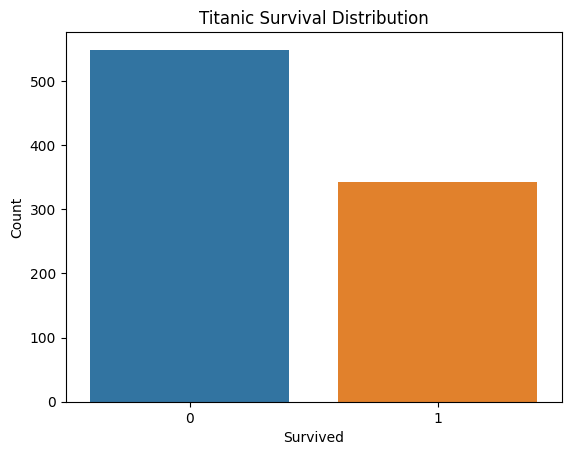

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


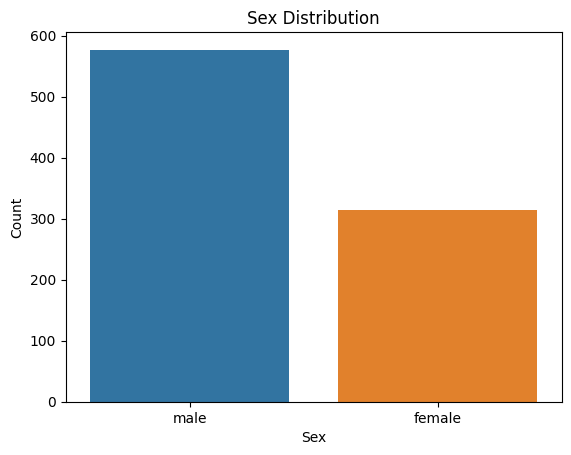

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


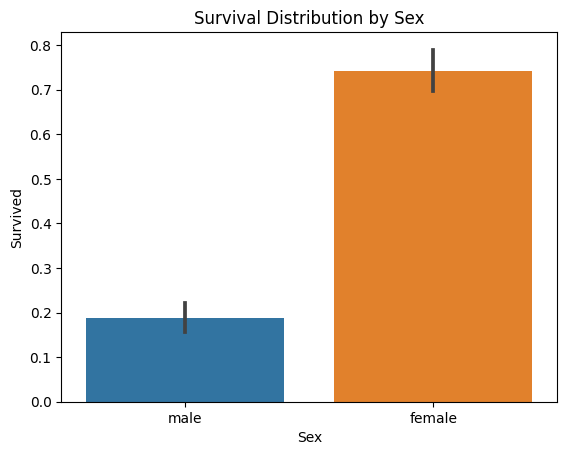

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


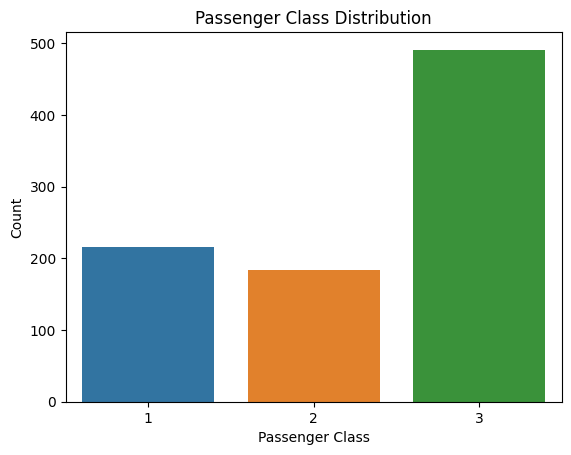

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


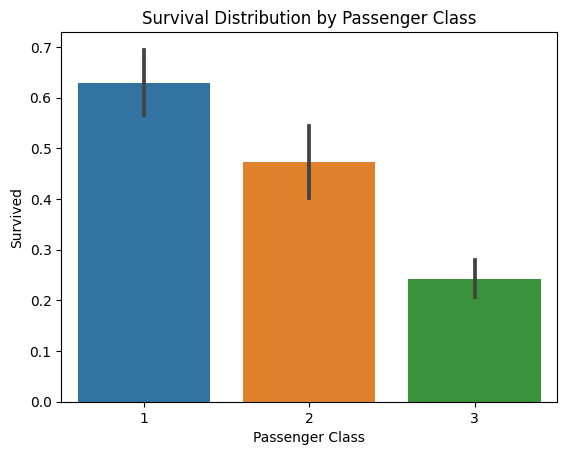

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


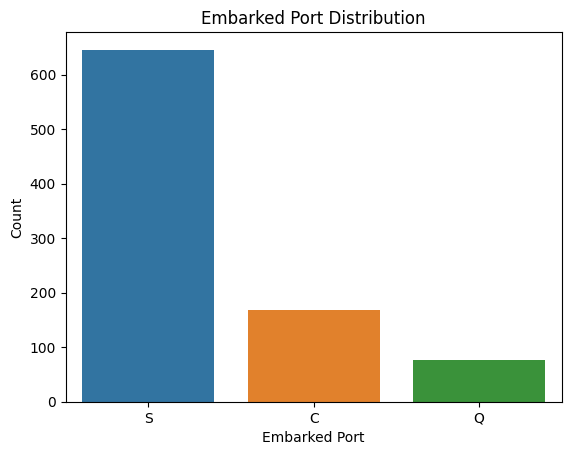

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


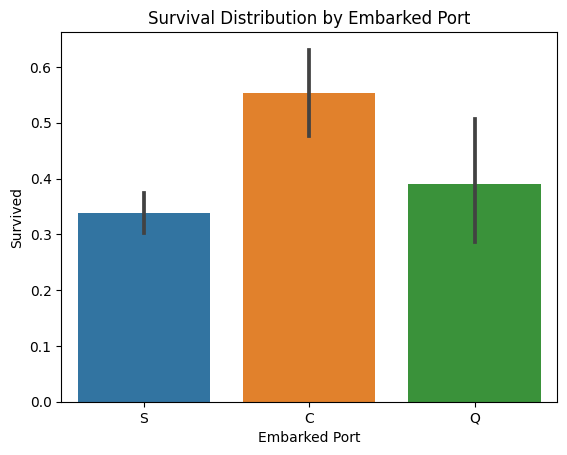

In [15]:
# Check the distribution of the target variable
sns.countplot(x='Survived', data=train)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Titanic Survival Distribution')
plt.show()

# Check the relationship between the target variable and other variables

sns.countplot(x='Sex', data=train)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()

sns.barplot(x="Sex", y="Survived", data=train)
plt.title('Survival Distribution by Sex')
plt.show()


sns.countplot(x='Pclass', data=train)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()

sns.barplot(x="Pclass", y="Survived", data=train)
plt.xlabel('Passenger Class')
plt.title('Survival Distribution by Passenger Class')
plt.show()

sns.countplot(x='Embarked', data=train)
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.title('Embarked Port Distribution')
plt.show()

sns.barplot(x="Embarked", y="Survived", data=train)
plt.xlabel('Embarked Port')
plt.title('Survival Distribution by Embarked Port')
plt.show()

**Passenger class**

In [16]:
# Calculate the survival rate by passenger class
survival_rate_by_class = train.groupby('Pclass')['Survived'].mean()
survival_rate_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


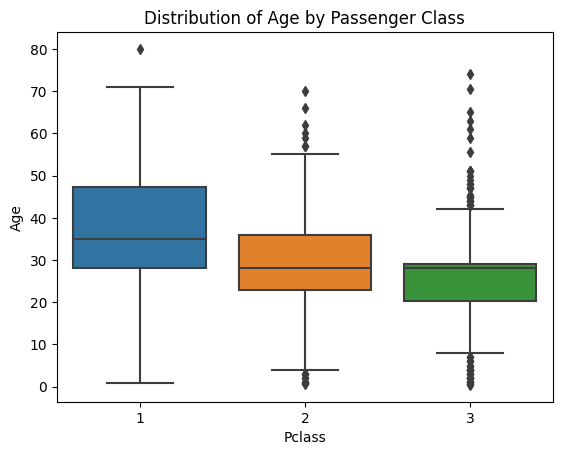

In [17]:
# Create a violin plot of the distribution of age by passenger class
sns.boxplot(x='Pclass', y='Age', data=train)
plt.title('Distribution of Age by Passenger Class')
plt.show()

**Sex**

**Age**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

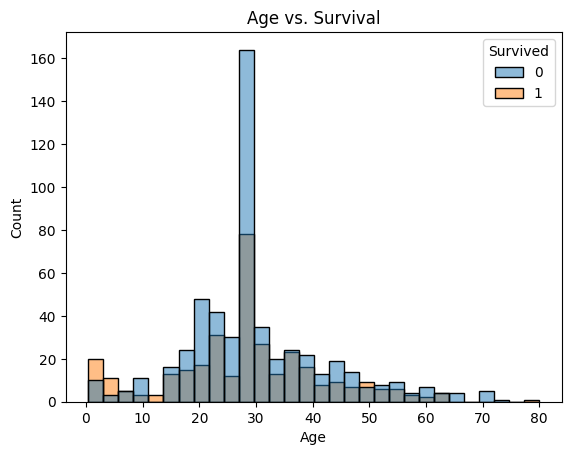

In [20]:
# Plot the distribution of age and survival
sns.histplot(x='Age', hue='Survived', data=train)
plt.title('Age vs. Survival')
plt.show()

**Fare**

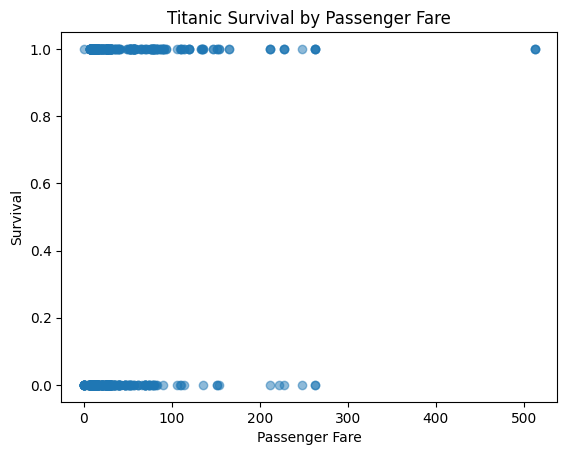

In [22]:
# Create a scatter plot
plt.scatter(train['Fare'], train['Survived'], alpha=0.5)

# Add labels and title
plt.xlabel('Passenger Fare')
plt.ylabel('Survival')
plt.title('Titanic Survival by Passenger Fare')

# Show the plot
plt.show()

**Embarked port**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

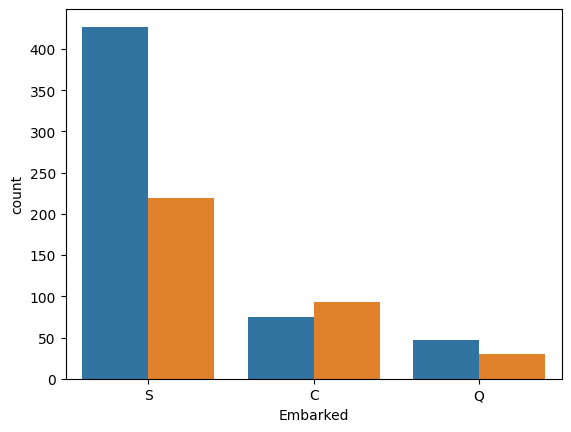

In [23]:
# Plot the distribution of embarked port and survival
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Embarked Port vs. Survival')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

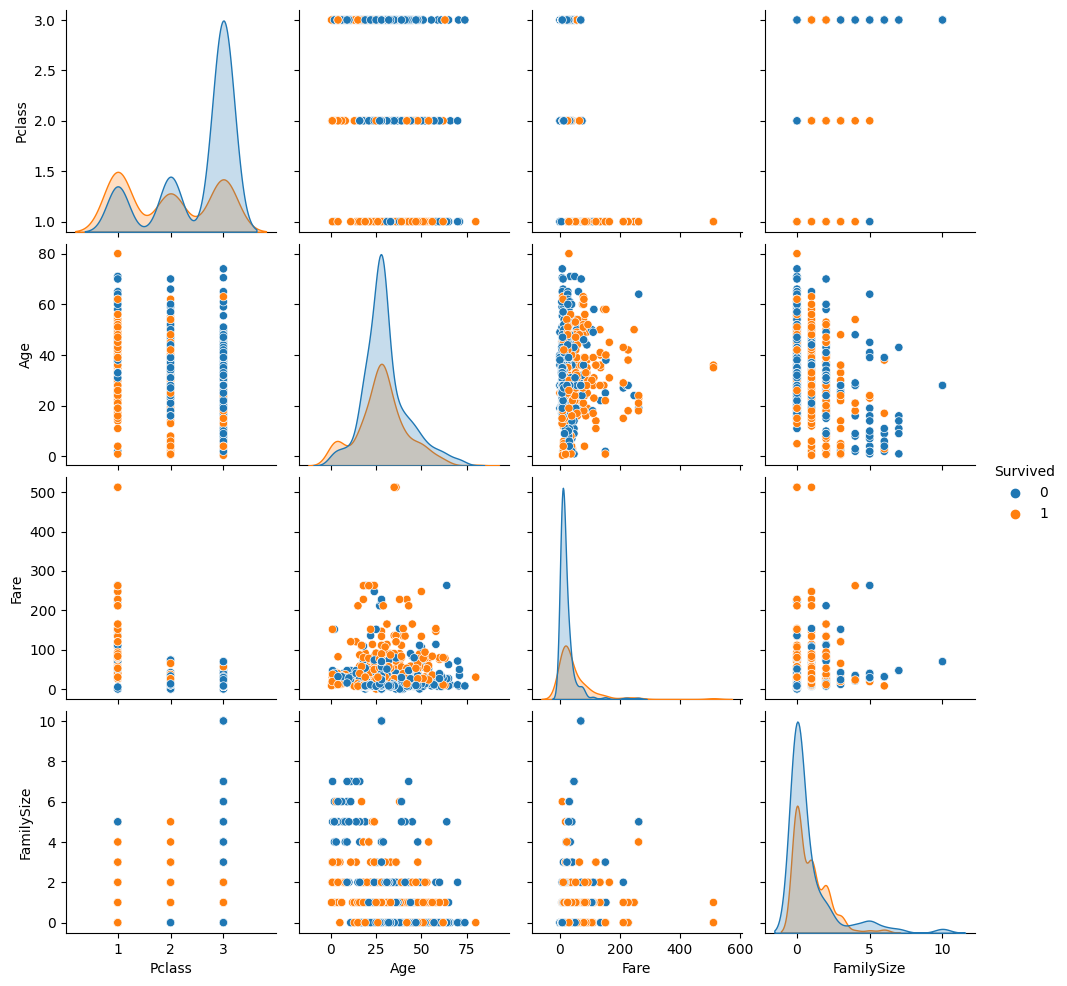

In [30]:
sns.pairplot(train, hue='Survived')

**Conclusion**

The exploratory data analysis of the Titanic dataset revealed the following key findings:

* Passengers from the first class had a much higher survival rate than passengers from the second and third classes.
* Women had a higher survival rate than men.
* Children and infants had a higher survival rate than adults.
* Passengers who paid a higher fare had a higher survival rate.
* Passengers who embarked from Cherbourg had a higher survival rate than passengers who embarked from Southampton or Queenstown.
* These findings suggest that social class, sex, age, and fare played a significant role in the survival of Titanic passengers.

In [24]:
embark = pd.get_dummies(train['Embarked']).astype(int)
sex = pd.get_dummies(train['Sex'], drop_first=True).astype(int)

train = pd.concat([train, embark, sex], axis=1)


In [25]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
train

,Survived,Pclass,Age,Fare,FamilySize,C,Q,S,male
PassengerId,,,,,,,,,
1,0,3,22.0,7.2500,1,0,0,1,1
2,1,1,38.0,71.2833,1,1,0,0,0
3,1,3,26.0,7.9250,0,0,0,1,0
4,1,1,35.0,53.1000,1,0,0,1,0
5,0,3,35.0,8.0500,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,13.0000,0,0,0,1,1
888,1,1,19.0,30.0000,0,0,0,1,0
889,0,3,28.0,23.4500,3,0,0,1,0


In [26]:
embark = pd.get_dummies(test['Embarked']).astype(int)
sex = pd.get_dummies(test['Sex'], drop_first=True).astype(int)

test = pd.concat([test, embark, sex], axis=1)

test.drop(['Sex', 'Embarked'], axis=1, inplace=True)
test

,Pclass,Age,Fare,FamilySize,C,Q,S,male
PassengerId,,,,,,,,
892,3,34.5,7.8292,0,0,1,0,1
893,3,47.0,7.0000,1,0,0,1,0
894,2,62.0,9.6875,0,0,1,0,1
895,3,27.0,8.6625,0,0,0,1,1
896,3,22.0,12.2875,2,0,0,1,0
...,...,...,...,...,...,...,...,...
1305,3,27.0,8.0500,0,0,0,1,1
1306,1,39.0,108.9000,0,1,0,0,0
1307,3,38.5,7.2500,0,0,0,1,1


dtype('float64')

# Machine Learning Models

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.25)

In [29]:
# Create a scaler
scaler = StandardScaler()

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [59]:
# Create a logistic regression model with different hyperparameters
lr_model = LogisticRegression(C=0.1)

# Fit the model to the training data
lr_model.fit(X_train, y_train)


# Evaluate the model on the test set
y_pred_lr = lr_model.predict(X_test)
print('Accuracy (Logistic Regression):', model_lr.score(X_test, y_pred_lr))
# Evaluate the model's performance
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

Accuracy (Logistic Regression): 1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       140
           1       0.81      0.76      0.78        83

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223

Confusion Matrix:
[[125  15]
 [ 20  63]]


# KNN

In [55]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred_knn = knn_model.predict(X_test)
# Accuracy
print('Accuracy (KNN): ', metrics.accuracy_score(y_test, y_pred_knn))
# Evaluate the model's performance
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))

Accuracy (KNN):  0.8026905829596412
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       140
           1       0.75      0.71      0.73        83

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

Confusion Matrix:
[[120  20]
 [ 24  59]]


# Decision Tree 

In [40]:
# create a Decision Tree with criterion gini with no max depth
dt_gini = DecisionTreeClassifier()

# create a Decision Tree with entropy criterion with no max depth
dt_entropy = DecisionTreeClassifier(criterion='entropy')
# create a Decision Tree with max depth 3
dt_depth = DecisionTreeClassifier(max_depth=3)

In [41]:
# fit the models
dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_depth = dt_depth.predict(X_test)

In [45]:
print('Accuracy of gini: ', metrics.accuracy_score(y_test, y_pred_gini))
print('Accuracy of entropy: ', metrics.accuracy_score(y_test, y_pred_entropy))
print('Accuracy of depth: ', metrics.accuracy_score(y_test, y_pred_depth))

Accuracy of gini:  0.7757847533632287
Accuracy of entropy:  0.7802690582959642
Accuracy of depth:  0.8340807174887892


# Support Vector Machine

In [46]:
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')

In [47]:
# fit
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [48]:
# predict
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [49]:
print('Accuracy (Linear):', metrics.accuracy_score(y_test, y_pred_linear))
print('Accuracy (Sigmoid): ', metrics.accuracy_score(y_test, y_pred_sigmoid))
print('Accuracy (RBF): ', metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy (Linear): 0.8385650224215246
Accuracy (Sigmoid):  0.7219730941704036
Accuracy (RBF):  0.8430493273542601


In [39]:
# Define a list of supervised machine learning algorithms and hyperparameter values to try
algorithms = [
    LogisticRegression(C=1.0),
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(n_neighbors=3),
]

# Train and evaluate each algorithm
for algorithm in algorithms:
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    accuracy = algorithm.score(X_test, y_test)
    print(f"{algorithm.__class__.__name__} Accuracy: {accuracy}")


LogisticRegression Accuracy: 0.8340807174887892
DecisionTreeClassifier Accuracy: 0.8385650224215246
KNeighborsClassifier Accuracy: 0.8161434977578476
